Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

Loading Data

In [2]:
df = pd.read_csv("D:/Year3/ML/adult.csv")

In [3]:
df.head(30)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
pd.concat([df.nunique(),df.dtypes])#view all features, amount of unique entries and datatype

age                    74
workclass               9
fnlwgt              28523
education              16
educational-num        16
marital-status          7
occupation             15
relationship            6
race                    5
gender                  2
capital-gain          123
capital-loss           99
hours-per-week         96
native-country         42
income                  2
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [5]:
df.groupby(['education','educational-num']).size()

education     educational-num
10th          6                   1389
11th          7                   1812
12th          8                    657
1st-4th       2                    247
5th-6th       3                    509
7th-8th       4                    955
9th           5                    756
Assoc-acdm    12                  1601
Assoc-voc     11                  2061
Bachelors     13                  8025
Doctorate     16                   594
HS-grad       9                  15784
Masters       14                  2657
Preschool     1                     83
Prof-school   15                   834
Some-college  10                 10878
dtype: int64

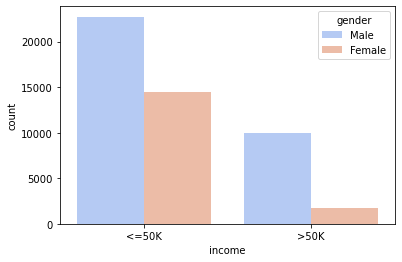

In [6]:
sns.countplot(df['income'],palette='coolwarm',hue='gender',data=df)#plot barchart 

Data Cleaning

In [7]:
df = df[df != '?']#removing '?' entries 
df = df.dropna()#dropping rows with empty entires
df['workclass'].value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [8]:
"""Loop to check if all entires with '?' are removed"""
for i in df:
    if "?" in df[i].value_counts():
        print("Remove \'?\' from: "+i)
#if nothing is returned data is clean from unknown entries

Feature cleaning

In [9]:
#categorised agains educational-num
df.education = df.education.replace(['1st-4th','5th-6th'],'Primary education')#2-3
df.education = df.education.replace(['7th-8th','9th','10th','11th','12th'],'Secondary education')#4-8
df.education = df.education.replace(['Some-college','HS-grad','Assoc-voc','Assoc-acdm'],'Higher')#9-12
df.education = df.education.replace(['Bachelors'],'Under-Graduate')#13
df.education = df.education.replace(['Masters'],'Graduate')#14
df.education = df.education.replace(['Prof-school'],'Post-Graduate')#15
df['education'].value_counts()

Higher                 28148
Under-Graduate          7570
Secondary education     4918
Graduate                2514
Post-Graduate            785
Primary education        671
Doctorate                544
Preschool                 72
Name: education, dtype: int64

In [10]:
#Chnaging income to binary
df.income = df.income.replace(['<=50K'],0)
df.income = df.income.replace(['>50K'],1)
df['income'].value_counts()

0    34014
1    11208
Name: income, dtype: int64

In [11]:
#Chnaging geneder entry to binary
df.gender = df.gender.replace(['Male'], 1)
df.gender = df.gender.replace(['Female'], 0)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,Secondary education,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0
1,38,Private,89814,Higher,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0
2,28,Local-gov,336951,Higher,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1
3,44,Private,160323,Higher,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,1
5,34,Private,198693,Secondary education,6,Never-married,Other-service,Not-in-family,White,1,0,0,30,United-States,0


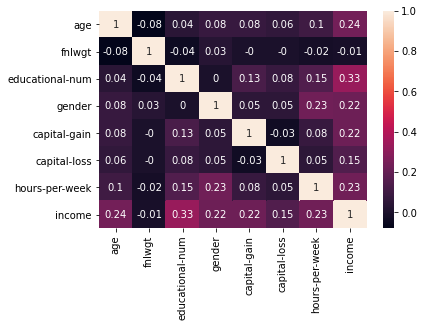

In [12]:
#plt.figure(figsize = (20,20))
corr_matrix =df.corr().round(2)
sns.heatmap(corr_matrix, annot=True)

Building model

In [15]:
df = df.apply(LabelEncoder().fit_transform)

x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=3)


standsca = StandardScaler().fit(x_train)
x_train_scaled = standsca.transform(x_train)
x_test_scaled = standsca.transform(x_test)

Logistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic = LogisticRegression()

model = logistic.fit(x_train,y_train)
y_test_pred = model.predict(x_test)

print("Training accuracy: {:,.3f}".format(model.score(x_train,y_train)))
print("Testing accuracy: {:,.3f}".format(model.score(x_test,y_test)))

NameError: name 'x_train' is not defined